In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Maharashtra.xlsx')

In [3]:
df

,Year,Life Expectancy
0,1991,58.8
1,1992,59.3
2,1993,59.7
3,1994,64.8
4,1995,65.4
5,1996,65.6
6,1997,65.5
7,1998,65.9
8,1999,66.0
9,2000,66.2


In [4]:
scaler = MinMaxScaler()
df[['Life Expectancy']] = scaler.fit_transform(df[['Life Expectancy']])

In [5]:
df1 = df[['Year','Life Expectancy']]

In [6]:
df1


,Year,Life Expectancy
0,1991,0.000000
1,1992,0.037313
2,1993,0.067164
3,1994,0.447761
4,1995,0.492537
5,1996,0.507463
6,1997,0.500000
7,1998,0.529851
8,1999,0.537313
9,2000,0.552239


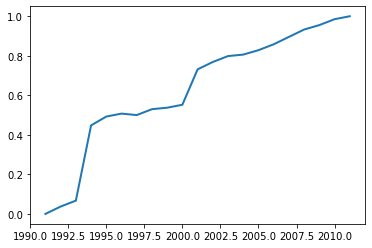

In [7]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

In [8]:

X = df1['Year'].values.reshape(-1,1)
y = df1['Life Expectancy'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2015,2018,2021,2024]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.256892881297972, 1.5265632494702004, 1.9080871343030594, 2.428008869232144]

In [12]:
dfTest['Life Expectancy'] = pred

In [13]:
df1 = df1.append(dfTest,ignore_index=True)

In [14]:
df1

,Year,Life Expectancy
0,1991,0.000000
1,1992,0.037313
2,1993,0.067164
3,1994,0.447761
4,1995,0.492537
5,1996,0.507463
6,1997,0.500000
7,1998,0.529851
8,1999,0.537313
9,2000,0.552239


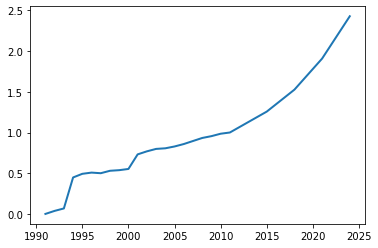

In [15]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

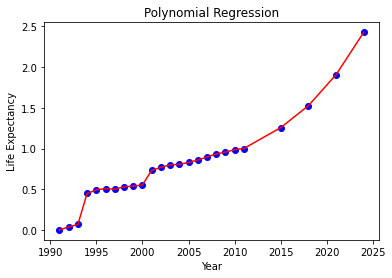

In [16]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show()

# WRT Unproportioned Scale

In [17]:
pred = []
for i in df1['Life Expectancy']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [18]:
pred

[59.0,
 59.0,
 60.0,
 65.0,
 65.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 69.0,
 69.0,
 70.0,
 70.0,
 70.0,
 70.0,
 71.0,
 71.0,
 72.0,
 72.0,
 72.0,
 76.0,
 79.0,
 84.0,
 91.0]

In [19]:
df1['Life Expectancy'] = pred

In [20]:
df1

,Year,Life Expectancy
0,1991,59.0
1,1992,59.0
2,1993,60.0
3,1994,65.0
4,1995,65.0
5,1996,66.0
6,1997,66.0
7,1998,66.0
8,1999,66.0
9,2000,66.0


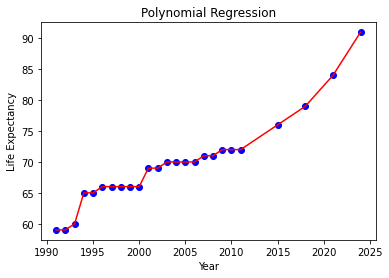

In [21]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show() 